# Final Project Submission

Please fill out:
* Student name: Deztany Jackson
* Student pace: self paced 
* Scheduled project review date/time: June 27, 2022
* Instructor name: Claude Fried
* Blog post URL: http://dmvinedata.com/blog/
***


## Microsoft Movie Studio Analysis

#### Authors: Deztany Jackson


## Overview 

This analysis directs Microsoft's potential studio head with actional insights on their path forward into developing a movie studio. These recommendations are determined from insights from box office movie "Ratings" and depends on other attributes such as "Genre", "Directors" and "Movie Budget". The datasets given were filtered to analyse movies and their associated  with a minimum of a  "8/10" ("B") rating. The analysis goal was to extract patterns from some of the "best" movies.

## Add RESULTS
## Add RECOMMENDATIONS




## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

Microsft is in competition with current major studios which have been in business for many years and already have a wealth of experience. The questions driving the analysis, support  Microsoft making choices based on direct data output from their  competition as well as  potential growth areas that may be overlooked. The analysis questions and main variable of success were chosen with the mindset, Microsoft is a major tech company that has influence and skillsets in other areas of tech. 

They have areas other usecases that can exploit findings"Ratings" are the mainThe potential growth areas are asked with the context of knowing Microsoft's technical coverage that can exploi a  a wealth of experienc

Ref: [Phase 1 Project Description](https://learning.flatironschool.com/courses/4963/pages/phase-1-project-description?module_item_id=370765), 2022

## Data Understanding

Box office related datasets (SQL and CSV) with the box office movie target "Rating" variable and associated independent  "Genre, Director and Budget" variable information  were taken from [IMBD](https://www.imdb.com/) and [the-numbers](https://www.the-numbers.com/). 

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Connecting with databases
conn = sqlite3.connect('im.db')


In [3]:
#View the list of tables in the database

df = pd.read_sql("""
SELECT name
FROM sqlite_master 
WHERE type = 'table';""", conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers
8,new_directors



### IMBD Tables Used:

 - **movie_basics**
     - The movie_basics dataset describes just over 146,000 movies with their associated genres, years.
 - **movie_ratings**
    - The movie_ratings dataset describes 73,856 movie'saverage rating (from average ratings that range from "1" to "10") and the number of votes the average is calculated (ranging from "5" to "1.84 Mil"). 
 - **directors**
     - The directors dataset describes 291,174 movies and their associated director's id.
 - **persons**
    - The persons dataset describes 606,648 people and their associated movie related profession(s). 

#### IMBD Table: movie_basics

In [4]:
#Looking at movie_basic table
q_basics = '''
SELECT
    *
FROM movie_basics;
'''
MovBasics_df = pd.read_sql(q_basics, conn)
#What does the dataset include?
MovBasics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
MovBasics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
MovBasics_df["genres"].value_counts()

Documentary                32185
Drama                      21486
Comedy                      9177
Horror                      4372
Comedy,Drama                3519
                           ...  
Crime,Mystery,Western          1
Comedy,Music,Mystery           1
Adventure,Fantasy,War          1
Comedy,Musical,Thriller        1
Sport,Thriller                 1
Name: genres, Length: 1085, dtype: int64

In [7]:
MovBasics_df.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [8]:
#Looking to see if there are any duplicates
q_basics = '''
SELECT
    movie_id,
    start_year,
    primary_title,
    genres,
    COUNT(*) AS CNT
FROM movie_basics
GROUP BY movie_id
HAVING COUNT(*) > 1
ORDER BY movie_id;
'''

MovBasics_df = pd.read_sql(q_basics, conn)
#Displays if there are duplicate movies
MovBasics_df

,movie_id,start_year,primary_title,genres,CNT


#### IMBD Table: movie_ratings

The average movie ratings are directly dependent on the "numvotes" column.

In [9]:
#Looking at movie_ratings table
q_basics = '''
SELECT
    *
FROM movie_ratings;'''

MovRatings_df = pd.read_sql(q_basics, conn)
MovRatings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
MovRatings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [11]:
MovRatings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [12]:
MovRatings_df.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

#### IMBD Table: directors

Multiple duplicates are found and need to be removed

In [13]:
#Looking at directors table
q_basics = '''
SELECT
    *
FROM directors;'''

MovDirID_df = pd.read_sql(q_basics, conn)
MovDirID_df.head(10)


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
5,tt0878654,nm2291498
6,tt0878654,nm2292011
7,tt0879859,nm2416460
8,tt0996958,nm2286991
9,tt0996958,nm2286991


In [14]:
MovDirID_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [15]:
MovDirID_df.describe()

,movie_id,person_id
count,291174,291174
unique,140417,109253
top,tt4050462,nm6935209
freq,3818,238


In [16]:
MovDirID_df.isna().sum()

movie_id     0
person_id    0
dtype: int64

#### IMBD Table: persons

In [17]:
#Looking at persons table for id and name
q_basics = '''
SELECT
    *
FROM persons;'''

MovDir_df = pd.read_sql(q_basics, conn)
MovDir_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [18]:
MovDir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [19]:
MovDir_df["primary_name"].isna().sum()

0

#### Budget CSV: movie_budgets
    - This dataset describes the movie budget and movie gross from 5782 movies. The movie name values are the only link to joining with other movie datasets.

In [20]:
#Import CSV to a dataframe
Bud_df = pd.read_csv('movie_budgets.csv')
Bud_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [21]:
#Note that the production_budget is a string and not a number
Bud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Preparation

###  Data Cleaning                                   


Merge movie_basic and movie_ratings on their shared movie_id primary key. 

In [22]:
#Joining movie_basics and ratings
qB1 = """
SELECT
    movie_id,
    start_year,
    primary_title,
    genres,
    averagerating,
    numvotes
FROM movie_basics
JOIN movie_ratings
    USING (movie_id)
GROUP BY movie_id
ORDER BY numvotes DESC, averagerating
;
"""
Genre_Ratings= pd.read_sql(qB1,conn)

In [23]:
movieG_df = pd.DataFrame(Genre_Ratings)
movieG_df.head()

,movie_id,start_year,primary_title,genres,averagerating,numvotes
0,tt1375666,2010,Inception,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt1345836,2012,The Dark Knight Rises,"Action,Thriller",8.4,1387769
2,tt0816692,2014,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
3,tt1853728,2012,Django Unchained,"Drama,Western",8.4,1211405
4,tt0848228,2012,The Avengers,"Action,Adventure,Sci-Fi",8.1,1183655


Split genres on seperate rows  
[Ref: Split Values on Rows on Stackoverflow  By Dan Allen Jun, 2013](https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows)

In [24]:
#Spliting the genres into sep rows by ","
s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1) # align index
s.name = "genres" #name to join on
s.head()

0       Action
0    Adventure
0       Sci-Fi
1       Action
1     Thriller
Name: genres, dtype: object

In [25]:
#delete old dataframe column with multiple values
del movieG_df["genres"]

In [26]:
#making it equal to the new dataframe
movieG1_df = movieG_df.join(s)
movieG1_df.head()

,movie_id,start_year,primary_title,averagerating,numvotes,genres
0,tt1375666,2010,Inception,8.8,1841066,Action
0,tt1375666,2010,Inception,8.8,1841066,Adventure
0,tt1375666,2010,Inception,8.8,1841066,Sci-Fi
1,tt1345836,2012,The Dark Knight Rises,8.4,1387769,Action
1,tt1345836,2012,The Dark Knight Rises,8.4,1387769,Thriller


#### Missing Values
Drop missing values from dataframe.

Depending on the amount of missing data I will drop the missing rows or fill in.  If there is a negligent amount compared to the entire dataset, I will choose to drop the values.

In [27]:
#Determine if there are missing data 
movieG1_df["genres"].isna().sum()

804

In [28]:
#Checking to see if any ratings values have missing data
movieG_df["averagerating"].isna().sum()

0

In [29]:
#drop missing values 
movieG1_df = movieG1_df.dropna()

Check similar genre values to see if any  could be merged.

In [30]:
movieG1_df["genres"].unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Thriller', 'Drama', 'Western',
       'Biography', 'Crime', 'Mystery', 'Comedy', 'Fantasy', 'Family',
       'Animation', 'Romance', 'Music', 'History', 'Horror', 'Sport',
       'War', 'Musical', 'Documentary', 'News', 'Game-Show', 'Reality-TV',
       'Adult', 'Short'], dtype=object)

In [31]:
#Checking genres values movies to see if they are compatible to be merged
genCat = movieG1_df.loc[(movieG1_df["genres"] == "Music") | (movieG1_df["genres"] == "Musical")]
genCat.head(20)

,movie_id,start_year,primary_title,averagerating,numvotes,genres
33,tt2582802,2014,Whiplash,8.5,616916,Music
88,tt3783958,2016,La La Land,8.0,436070,Music
141,tt1727824,2018,Bohemian Rhapsody,8.0,345466,Music
184,tt1707386,2012,Les Misérables,7.6,285971,Musical
209,tt1981677,2012,Pitch Perfect,7.2,256565,Music
218,tt1517451,2018,A Star Is Born,7.8,249245,Music
230,tt2771200,2017,Beauty and the Beast,7.2,238325,Musical
307,tt1485796,2017,The Greatest Showman,7.6,199663,Musical
390,tt1226229,2010,Get Him to the Greek,6.4,161653,Music
473,tt2848292,2015,Pitch Perfect 2,6.4,130692,Music


The "Music" and "Musical" values have enough similarities where we can merge them. There isn't a clear distinction between them.

In [32]:
# Rename values in genre to match
movieG1_df["genres"].replace("Musical","Music", inplace = True)

Checking the statistical measures of the number of votes. I want to consider the average ratings that were made from a certain amount of votes. The mean number will be considered. 

In [33]:
#Check the mean amount of votes given. 
movieG1_df.describe()

,start_year,averagerating,numvotes
count,128490.000000,128490.000000,1.284900e+05
mean,2014.221021,6.302146,5.337769e+03
std,2.579176,1.457744,3.808942e+04
min,2010.000000,1.000000,5.000000e+00
25%,2012.000000,5.400000,1.600000e+01
50%,2014.000000,6.400000,6.600000e+01
75%,2016.000000,7.300000,4.290000e+02
max,2019.000000,10.000000,1.841066e+06


### Filter Ratings

Use data that is filtered by an averagerating with a minimum value of "8" and with a minimum numvotes with a minimum value of the mean (5337). Rationale:  The analysis goal was to extract patterns from some of the "best" movies. An "8/10" rating is equivalent to a "B" rating. I am confident that "8/10" rating will be a good rating even in the midst of other dataset sources. Using the mean numvotes filters out a lot of lower outliers where a low number of votes produced high ratings. This allows the ratings used to be more credible.    

In [34]:
#Filters future dataset for a certain averagerating and numvote values
g = movieG1_df.loc[(movieG1_df["averagerating"] >=8) & (movieG1_df["numvotes"] > movieG1_df["numvotes"].mean())]
g.head(25)

,movie_id,start_year,primary_title,averagerating,numvotes,genres
0,tt1375666,2010,Inception,8.8,1841066,Action
0,tt1375666,2010,Inception,8.8,1841066,Adventure
0,tt1375666,2010,Inception,8.8,1841066,Sci-Fi
1,tt1345836,2012,The Dark Knight Rises,8.4,1387769,Action
1,tt1345836,2012,The Dark Knight Rises,8.4,1387769,Thriller
2,tt0816692,2014,Interstellar,8.6,1299334,Adventure
2,tt0816692,2014,Interstellar,8.6,1299334,Drama
2,tt0816692,2014,Interstellar,8.6,1299334,Sci-Fi
3,tt1853728,2012,Django Unchained,8.4,1211405,Drama
3,tt1853728,2012,Django Unchained,8.4,1211405,Western


In [35]:
#View filtered data statisics with 
g.describe()

,start_year,averagerating,numvotes
count,522.000000,522.000000,5.220000e+02
mean,2014.348659,8.251533,1.818726e+05
std,2.487027,0.285624,3.110069e+05
min,2010.000000,8.000000,5.406000e+03
25%,2013.000000,8.100000,9.988000e+03
50%,2014.000000,8.200000,2.937300e+04
75%,2016.000000,8.300000,1.816010e+05
max,2019.000000,9.700000,1.841066e+06


### Remove Duplicates from Directors

In [36]:
#Database querying through SQL
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [37]:
#Checking Duplicates in directors table
q = """
SELECT
*,
COUNT (*) AS CNT
FROM directors
GROUP BY movie_id, person_id
HAVING CNT >1;
"""
Dir_Dup = pd.read_sql(q,conn)
Dir_Dup

,movie_id,person_id,CNT
0,tt0063540,nm0712540,4
1,tt0069049,nm0000080,2
2,tt0100275,nm0749914,2
3,tt0100275,nm0765384,2
4,tt0146592,nm1030585,2
...,...,...,...
54672,tt9916538,nm8185151,3
54673,tt9916622,nm9272490,2
54674,tt9916622,nm9272491,2
54675,tt9916754,nm8349149,2


Ref: [Remove Duplicates](https://www.youtube.com/watch?v=w9dwX7xsBgY) By Database Star

In [72]:
#SQL Remove Duplicate Rows: A How-to-Guide
q = """
CREATE TABLE new_directors AS
SELECT 
    movie_id, 
    person_id
FROM directors
GROUP BY movie_id, person_id ;
"""
NEWP = pd.read_sql(q,conn)
NEWP

DatabaseError: Execution failed on sql '
CREATE TABLE new_directors AS
SELECT 
    movie_id, 
    person_id
FROM directors
GROUP BY movie_id, person_id ;
': table new_directors already exists

In [39]:
#Checking Duplicates in new table
q = """
SELECT
*,
COUNT (*) AS CNT
FROM new_directors
GROUP BY movie_id, person_id
HAVING CNT >1;
"""
newD_Dup = pd.read_sql(q,conn)
newD_Dup

,movie_id,person_id,CNT


In [1]:
#Code to drop tables if running code again

q = """

DROP TABLE im.new_directors;

"""

pd.read_sql(q,conn)

NameError: name 'pd' is not defined

In [40]:
#Joining of several tables to get movie id and their director
qD = """
SELECT
    movie_id,
    primary_name AS Director
FROM movie_basics 
JOIN movie_ratings
    USING (movie_id)
JOIN new_directors
    USING (movie_id)
JOIN persons
    USING(person_id);
"""
Dir_Sql = pd.read_sql(qD,conn)

movieD2_df = pd.DataFrame(Dir_Sql)
movieD2_df

,movie_id,Director
0,tt0063540,Harnam Singh Rawail
1,tt0066787,Mani Kaul
2,tt0069049,Orson Welles
3,tt0069204,Hrishikesh Mukherjee
4,tt0100275,Raoul Ruiz
...,...,...
86025,tt9913084,Giancarlo Soldi
86026,tt9914286,Ahmet Faik Akinci
86027,tt9914642,Chris Jordan
86028,tt9914942,Laura Jou


In [41]:
#Import Budget CSV in
Bud_df = pd.read_csv('movie_budgets.csv')
Bud_df.head()
Bud_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


 Clean the production budget column. Convert to type int

In [42]:
#Remove necessary characters from string
Bud_df["production_budget"]=Bud_df["production_budget"].str.strip("$")
Bud_df["production_budget"]=Bud_df["production_budget"].str.replace(",", "")

In [43]:

#Convert Budget from string to int necessary
Bud_df["production_budget"]=Bud_df["production_budget"].astype(int) 
Bud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(2), object(4)
memory usage: 271.2+ KB


In [44]:
#Join this table with Bud_df table - 599 Rows
q = """
SELECT 
   averagerating,
   numvotes,
   movie_id,
   genres,
   Director,
   primary_title
FROM g
JOIN movieD2_df
    USING (movie_id);
"""
BudMovie = pysqldf(q)
BudMovie

,averagerating,numvotes,movie_id,genres,Director,primary_title
0,8.8,1841066,tt1375666,Action,Christopher Nolan,Inception
1,8.8,1841066,tt1375666,Adventure,Christopher Nolan,Inception
2,8.8,1841066,tt1375666,Sci-Fi,Christopher Nolan,Inception
3,8.4,1387769,tt1345836,Action,Christopher Nolan,The Dark Knight Rises
4,8.4,1387769,tt1345836,Thriller,Christopher Nolan,The Dark Knight Rises
...,...,...,...,...,...,...
594,8.1,5406,tt1572781,Animation,Yasuhiro Takemoto,The Disappearance of Haruhi Suzumiya
595,8.1,5406,tt1572781,Comedy,Tatsuya Ishihara,The Disappearance of Haruhi Suzumiya
596,8.1,5406,tt1572781,Comedy,Yasuhiro Takemoto,The Disappearance of Haruhi Suzumiya
597,8.1,5406,tt1572781,Drama,Tatsuya Ishihara,The Disappearance of Haruhi Suzumiya


The budget data came from a different source than the baseic movie data. The tables can be joined on the name of the movie which are both strings. These two attributes make the join very error prone. From the original 5782 rows from the budget table, the join dropped the instances to 173. This is over 400 less than the IMDB movie and director joined table.

In [45]:
#Join the tables
#Joining by names narrowed the list to 173 entries
q = """
SELECT
*
FROM BudMovie AS bm
JOIN Bud_df bd
    ON bm.primary_title = bd.movie;
"""
bud_join= pysqldf(q)
bud_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   averagerating      173 non-null    float64
 1   numvotes           173 non-null    int64  
 2   movie_id           173 non-null    object 
 3   genres             173 non-null    object 
 4   Director           173 non-null    object 
 5   primary_title      173 non-null    object 
 6   id                 173 non-null    int64  
 7   release_date       173 non-null    object 
 8   movie              173 non-null    object 
 9   production_budget  173 non-null    int64  
 10  domestic_gross     173 non-null    object 
 11  worldwide_gross    173 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 16.3+ KB


## Analysis

Count the number of movies each genre has with min a rating of "8" and min 5337 votes.
Look at genres with high ratings and a large amount of votes - subjective but insightful
Look at genres with not a lot of movies for potentia cases



   #### Genre Questions:
    -What are the top rated genres by?       
        Consider the the number of votes to determine he average.
    -What is the number of movies does each genre contain.

In [46]:
#Genres and Ratings
mC ="""
SELECT
    genres,
    COUNT (movie_id) AS MCNT,
    ROUND (AVG(numvotes), 0) as Avg_Votes, 
    ROUND (AVG(averagerating), 1) as Avg_Rating
FROM g
GROUP BY genres
ORDER BY  MCNT DESC;
"""
MovieCount = pysqldf(mC)
MovieCount

,genres,MCNT,Avg_Votes,Avg_Rating
0,Drama,124,156815.0,8.3
1,Action,52,253171.0,8.3
2,Documentary,44,19787.0,8.3
3,Crime,43,93765.0,8.3
4,Comedy,37,177859.0,8.2
5,Thriller,36,166739.0,8.2
6,Biography,34,193086.0,8.2
7,Adventure,33,451840.0,8.2
8,Animation,19,160027.0,8.2
9,Mystery,17,185083.0,8.3


#### Director Questions: 
    -How many different type of genres does each director have? 
    -How many movies does each director have (with preconditions) 
    -Which directors does each genre have?
    -Who are the top 10 directors that have more than 2 movies with top rated rnges

The filtered (averagerating and numvotes) dataframe "g" will be used throughout the queries

In [47]:
#Number of Directors in each genre 
q = """SELECT  
   genres,
   COUNT (Director) AS DirCount
FROM g
JOIN movieD2_df
    USING (movie_id)
GROUP BY genres
ORDER BY DirCount DESC;
"""
Gen_Dir_Count = pysqldf(q)
Gen_Dir_Count

,genres,DirCount
0,Drama,134
1,Action,58
2,Documentary,53
3,Crime,47
4,Adventure,44
5,Comedy,43
6,Biography,40
7,Thriller,37
8,Animation,28
9,Music,18


In [48]:
#Director and Distinct Movie Count & Genre Count
q = """
SELECT 
    director,
    COUNT ( DISTINCT movie_id) AS Movie_Count,
    COUNT (DISTINCT  genres) AS Genre_Count
FROM g
JOIN movieD2_df
    USING (movie_id)   
GROUP BY director
ORDER BY Movie_Count DESC;
"""

Dir_Mov_Gen_Count = pysqldf(q)
Dir_Mov_Gen_Count

,Director,Movie_Count,Genre_Count
0,Martin Scorsese,3,7
1,Denis Villeneuve,3,5
2,Christopher Nolan,3,5
3,Zoya Akhtar,2,3
4,Sukumar,2,4
...,...,...,...
211,Advait Chandan,1,2
212,Adrian Molina,1,3
213,Aditya Dhar,1,3
214,Adesh Prasad,1,3


Want to look at directors who have done more than one movie. This looks at their experience and versatility.

In [49]:
#Specific genres for Directors that have more one move
q = """
SELECT 
    director,
    genres
FROM g
JOIN movieD2_df
    USING (movie_id)
GROUP BY director, genres
HAVING COUNT ( DISTINCT movie_id) > 1
ORDER BY genres;
"""

Dir_Gen = pysqldf(q)
Dir_Gen

,Director,genres
0,Anthony Russo,Action
1,Christopher Nolan,Action
2,Joe Russo,Action
3,S.S. Rajamouli,Action
4,Sukumar,Action
5,Anthony Russo,Adventure
6,Christopher Nolan,Adventure
7,Dragan Bjelogrlic,Adventure
8,Joe Russo,Adventure
9,Lee Unkrich,Adventure


In [50]:
#Genres with their Average Rating and Average votes & associated directors
q = """
SELECT 
    genres,
    ROUND (AVG(numvotes), 0) as Avg_Votes,
    ROUND (AVG(averagerating), 1) as Avg_Rating,
    COUNT(Director) AS Dir_Count
FROM g
JOIN movieD2_df
    USING (movie_id)
    
WHERE director IN (SELECT 
    director   
FROM g
JOIN movieD2_df 
    USING (movie_id)
GROUP BY director
HAVING COUNT ( DISTINCT movie_id )  > 1)

GROUP BY genres
ORDER BY Dir_Count DESC, genres ASC

"""

Dir_Gen_C = pysqldf(q)
Dir_Gen_C

,genres,Avg_Votes,Avg_Rating,Dir_Count
0,Drama,235838.0,8.3,30
1,Action,434326.0,8.5,15
2,Adventure,581501.0,8.4,12
3,Comedy,193201.0,8.4,8
4,Crime,217793.0,8.2,8
5,Mystery,269043.0,8.1,8
6,Sci-Fi,795105.0,8.5,8
7,Thriller,325420.0,8.1,8
8,Biography,235866.0,8.2,6
9,Music,239015.0,8.2,6


#### Budget Questions:
    -How does the different dataset impact the findings?
    -What types of movies have the highest, medium and lowest budgets?
    -Which directors and genres are associated with the highest budgets? Patterns?
    -What top genres of movie of movie have mid level budgets?
   

In [51]:
#Refine the joined budget list.  
#Look to see if the top genres are top and if the same directors for the same movies are still good
q ="""
SELECT
    movie_id,
    movie,
    Director,
    genres,
    averagerating,
    numvotes,
    production_budget AS pbud 

FROM bud_join
ORDER BY pbud DESC;
"""
budget_df= pysqldf(q)
budget_df

,movie_id,movie,Director,genres,averagerating,numvotes,pbud
0,tt4154756,Avengers: Infinity War,Anthony Russo,Action,8.5,670926,300000000
1,tt4154756,Avengers: Infinity War,Joe Russo,Action,8.5,670926,300000000
2,tt4154756,Avengers: Infinity War,Anthony Russo,Adventure,8.5,670926,300000000
3,tt4154756,Avengers: Infinity War,Joe Russo,Adventure,8.5,670926,300000000
4,tt4154756,Avengers: Infinity War,Anthony Russo,Sci-Fi,8.5,670926,300000000
...,...,...,...,...,...,...,...
168,tt2375605,The Act of Killing,Christine Cynn,Crime,8.2,31115,1000000
169,tt2375605,The Act of Killing,Joshua Oppenheimer,Crime,8.2,31115,1000000
170,tt2375605,The Act of Killing,Anonymous,Documentary,8.2,31115,1000000
171,tt2375605,The Act of Killing,Christine Cynn,Documentary,8.2,31115,1000000


In [52]:
#Look at average budget for genres
q ="""
SELECT
    genres,
    ROUND (AVG(pbud), 0) as Avg_pbud,
    COUNT (genres) AS Gen_COUNT
FROM budget_df
GROUP BY genres

;
"""
budA_Gen_df= pysqldf(q)
budA_Gen_df

,genres,Avg_pbud,Gen_COUNT
0,Action,122227273.0,22
1,Adventure,146557692.0,26
2,Animation,134500000.0,13
3,Biography,41136364.0,11
4,Comedy,118928571.0,14
5,Crime,23777778.0,9
6,Documentary,1771429.0,7
7,Drama,39854286.0,35
8,Family,20000000.0,1
9,History,15850000.0,4


## Data Analysis

The data is modeled using scatter plots and colormaps. This modeling method allowed the use of 3 main variables depending. I could show the correlation between two independent variables as well as the Rating (using color) on each visual.

The initial plan was to use a different type of graph for the different independent variables. Because of complexity and in the ability to show the correlation between more tna two variables a scatter plot with a colormap was used each time.

The three main independent variables chosen where "Genre, Director & Budget". When looking through the data, other variables impacted the interpretation of this data in relation to the Rating (e.g. number of votes, start year).

Ref:[Austin Animal Center Needs Project Example](https://github.com/learn-co-curriculum/dsc-project-template/blob/example-mvp/animal_shelter_needs_analysis.ipynb) 

### Genre Analysis

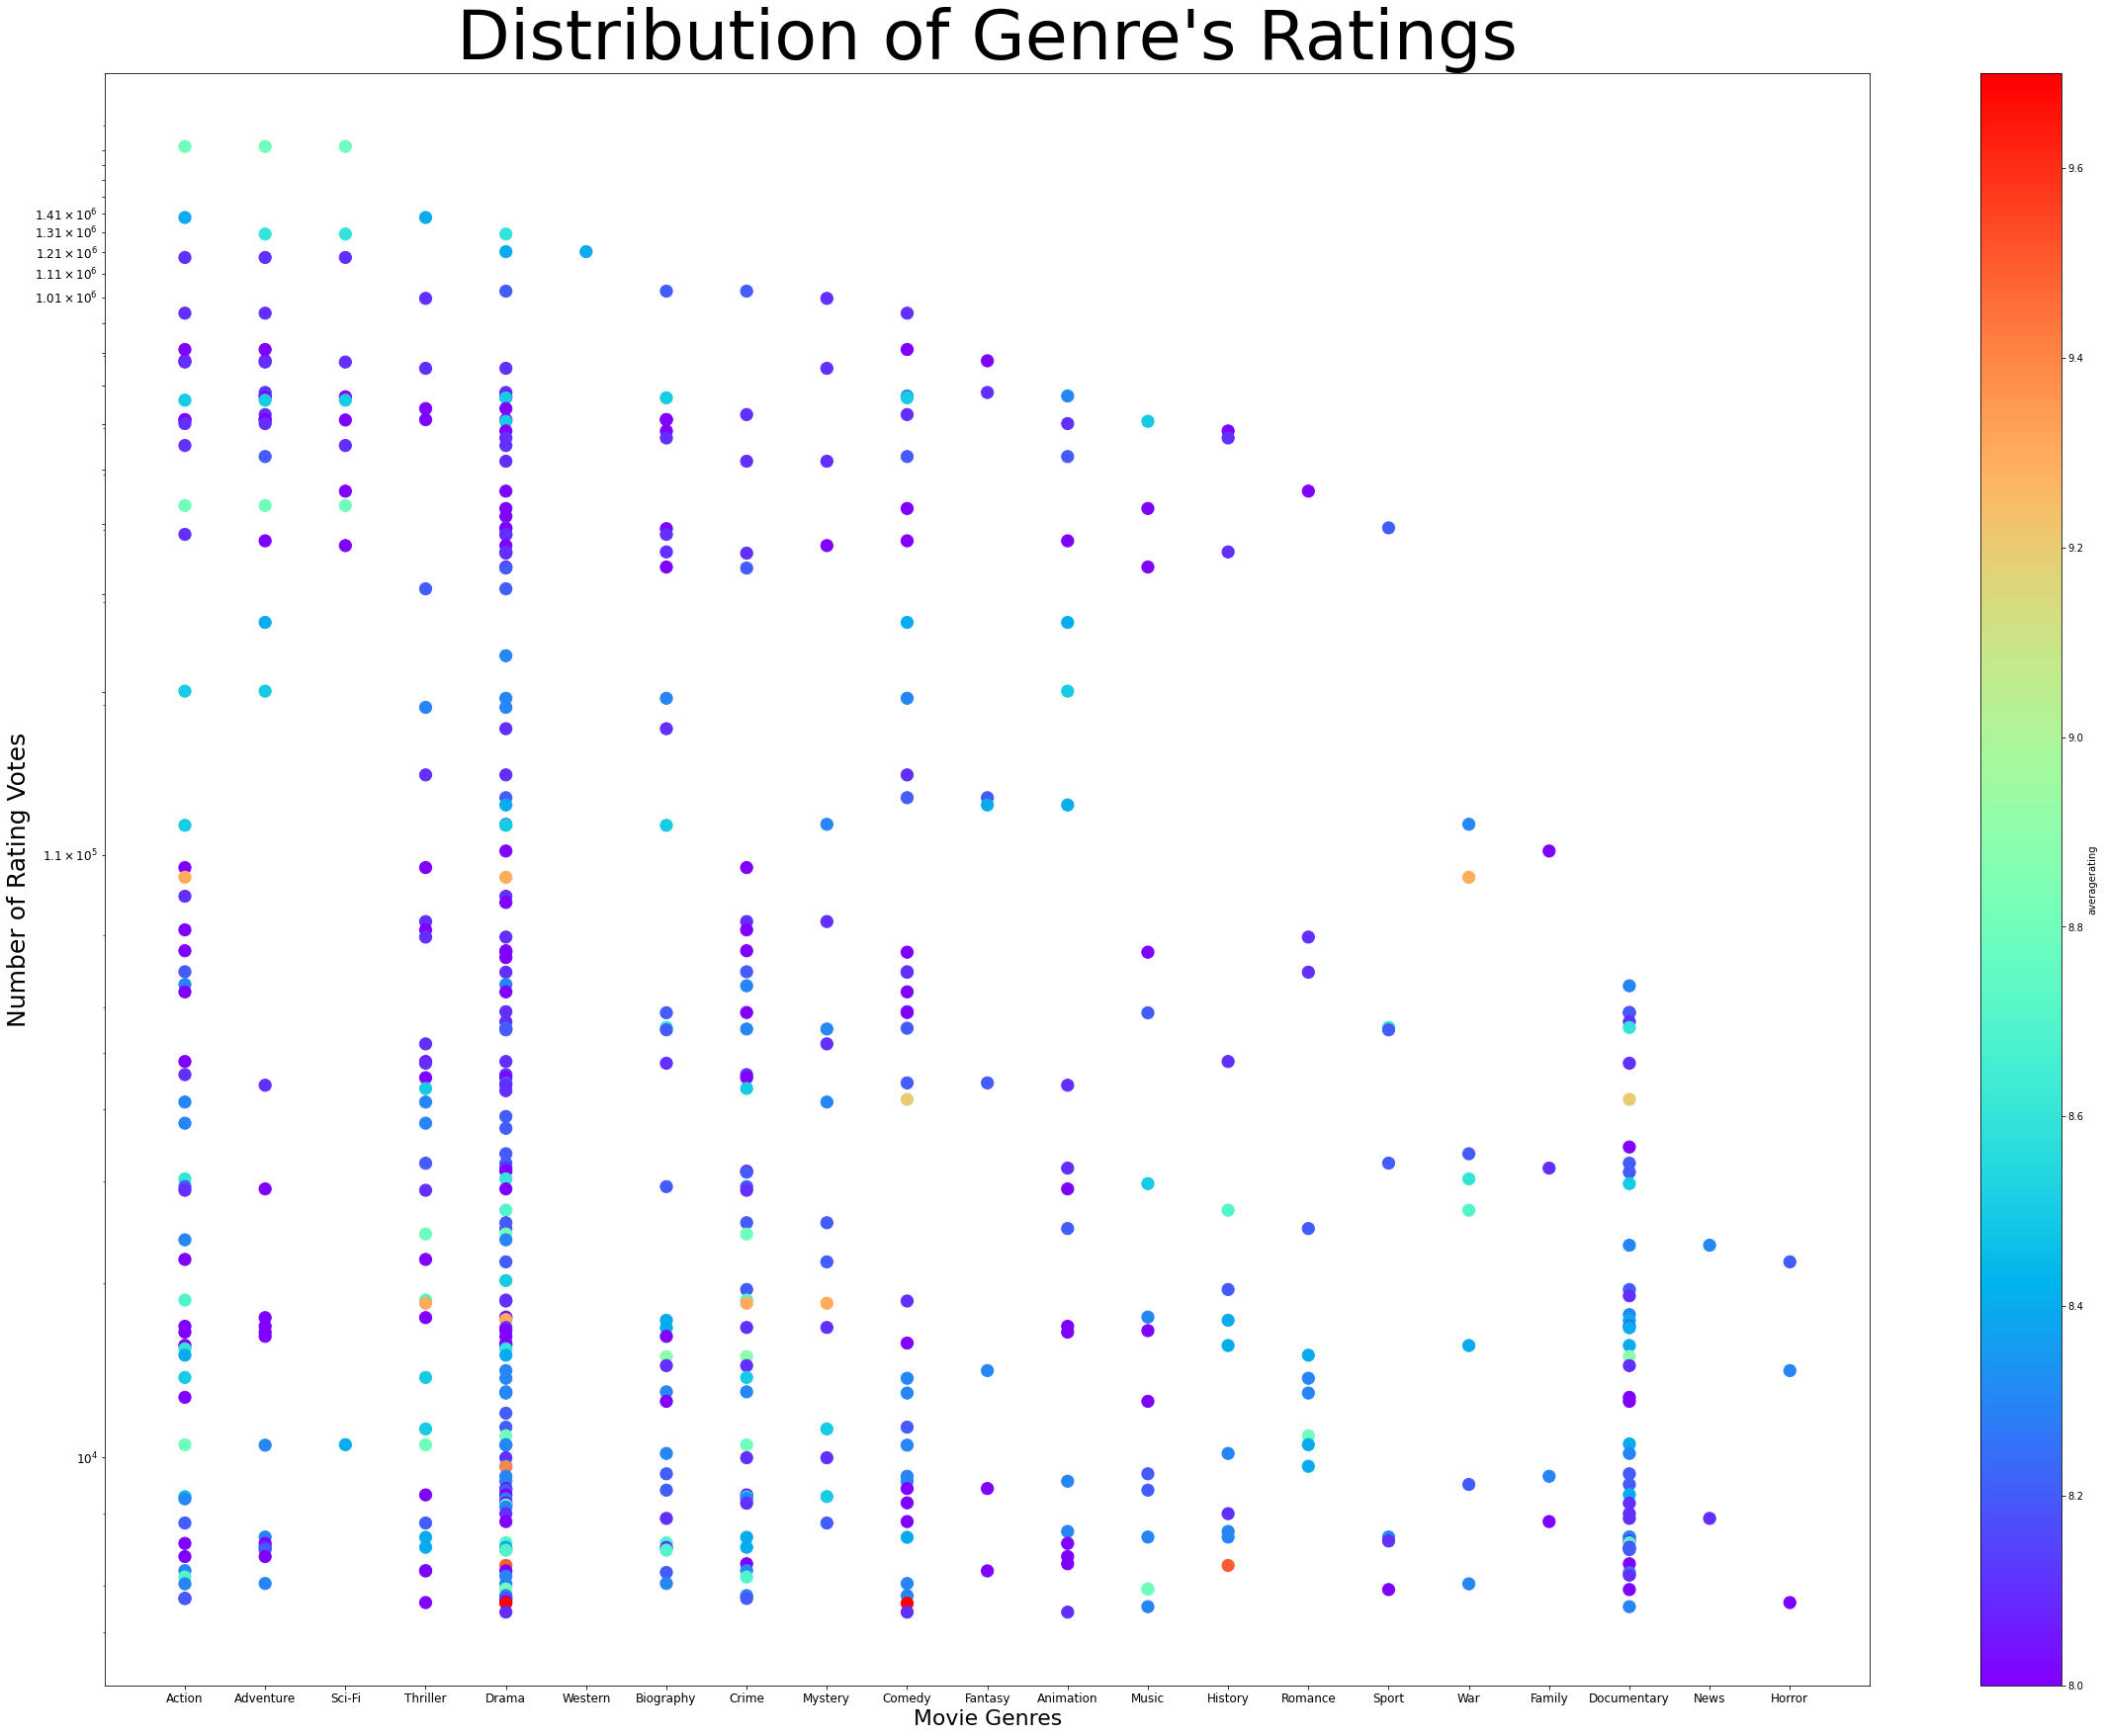

In [53]:
#Create Plot
fig, genre_rating_ax = plt.subplots(ncols = 1, nrows = 1, figsize=(40, 30))

g.plot.scatter(x = "genres", y = "numvotes", c = "averagerating", fontsize = 12,  s = 150,  colormap = "rainbow",   ax= genre_rating_ax )
genre_rating_ax .set_yscale('log', subs = [2,3,4,5,6,8])

x = np.arange(10000, 1900000, 100000)
genre_rating_ax.set_yticks(x)

#Set titles
genre_rating_ax.set_title("Distribution of Genre's Ratings", fontsize=70)
genre_rating_ax.set_ylabel('Number of Rating Votes', fontsize=25)
genre_rating_ax.set_xlabel('Movie Genres', fontsize=22)

#Save image in folder
fig.savefig("genre_ratings.png", dpi=150)
#plt.show()


### Director Analysis

In [54]:
#Table for plotting Top Directs more than 1 movie and genre by ratings
#Using only top genres with most directors Dir_Gen_C

q = """
SELECT 
    director, 
    genres,
    ROUND (AVG(numvotes), 0) as Avg_Votes,
    ROUND (AVG(averagerating), 1) as Avg_Rating
FROM g
JOIN movieD2_df
    USING (movie_id)
    
WHERE director IN (SELECT 
    director   
FROM g
JOIN movieD2_df 
    USING (movie_id)
GROUP BY director
HAVING COUNT ( DISTINCT movie_id )  > 1)
AND genres IN (
SELECT
    genres
FROM Dir_Gen_C)
GROUP BY genres, director
ORDER BY Avg_Rating DESC, Director 

"""

Dir_Plot_df = pysqldf(q)
Dir_Plot_df

,Director,genres,Avg_Votes,Avg_Rating
0,Quentin Tarantino,Comedy,5600.0,9.7
1,Alper Caglar,War,100568.0,9.3
2,Alper Caglar,Action,100568.0,9.3
3,Quentin Tarantino,Drama,608503.0,9.1
4,Alper Caglar,Drama,59006.0,8.7
...,...,...,...,...
84,Neeraj Pandey,Drama,45299.0,8.0
85,Neeraj Pandey,Crime,45299.0,8.0
86,Neeraj Pandey,Action,48318.0,8.0
87,Stephen Chbosky,Family,111632.0,8.0


I care more about what type of genres the Directors movies are not necessarily how many movies fall into the specific genres

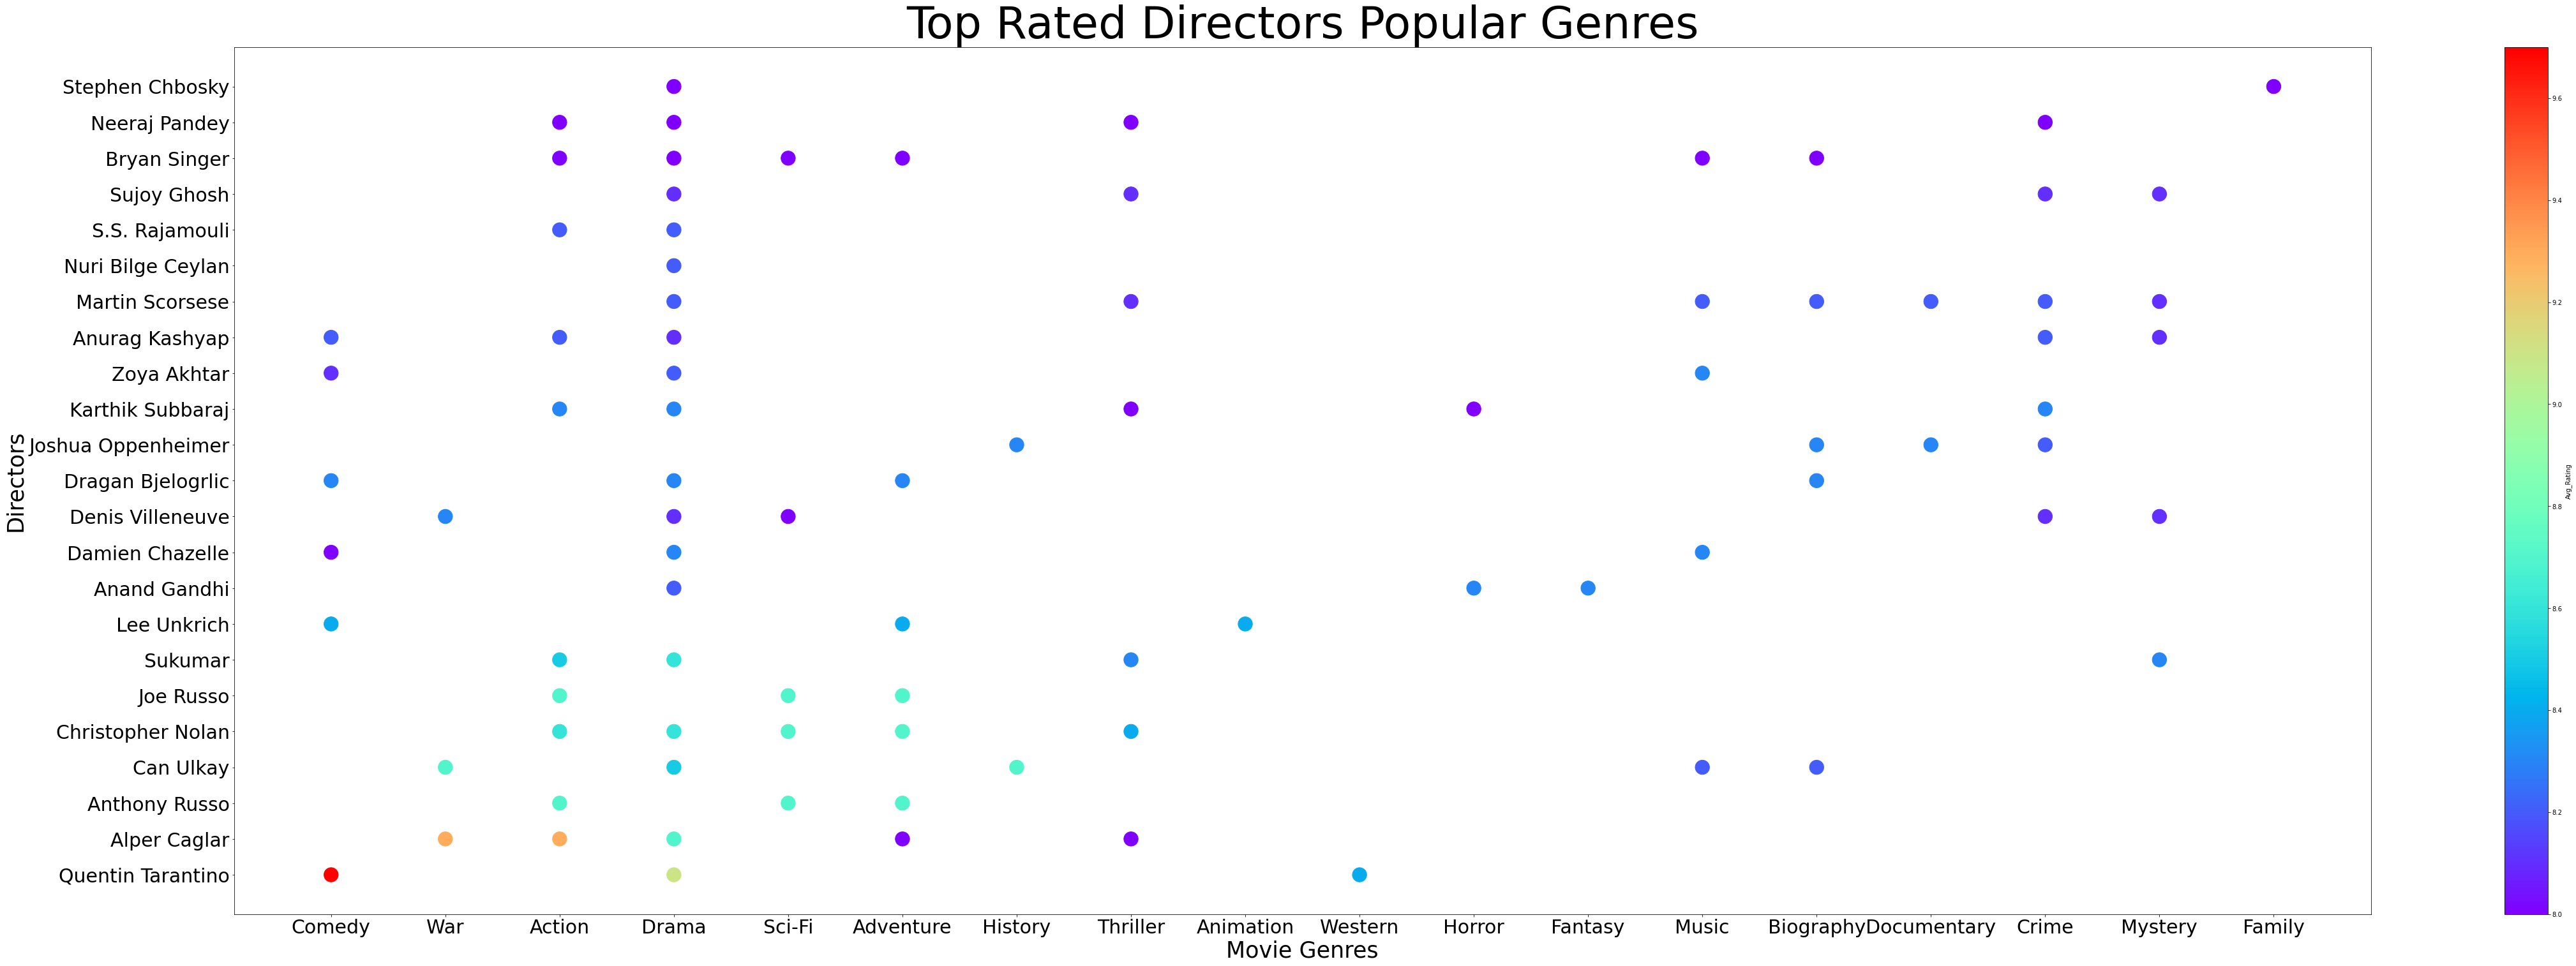

In [55]:
#Create Plot

fig, genreDir_rating_ax = plt.subplots(ncols = 1, nrows = 1, figsize=(75, 25))

Dir_Plot_df.plot.scatter(x = "genres", y = "Director", c = "Avg_Rating" ,    s = 500,  colormap = "rainbow",   ax= genreDir_rating_ax )

#Set titles
genreDir_rating_ax.set_title('Top Rated Directors Popular Genres', fontsize=70)
genreDir_rating_ax.set_ylabel('Directors', fontsize=35)
genreDir_rating_ax.set_xlabel('Movie Genres', fontsize=35)


genreDir_rating_ax.tick_params(axis='x', labelsize=30)
genreDir_rating_ax.tick_params(axis='y', labelsize=30)


#Save image in folder
fig.savefig("genre_ratings_Director.png", dpi=150)
#plt.show()


### Budget Analysis

In [56]:
#Searching from directors identified in other data with budget data
#Look at top 5-10 Directors and the movies 
q = """
SELECT
    director,
    movie,
    genres,
    pbud
FROM budget_df
WHERE director IN
    (SELECT
        director
    FROM Dir_Plot_df)

"""
BudDir_df= pysqldf(q)
BudDir_df.head() 

,Director,movie,genres,pbud
0,Anthony Russo,Avengers: Infinity War,Action,300000000
1,Joe Russo,Avengers: Infinity War,Action,300000000
2,Anthony Russo,Avengers: Infinity War,Adventure,300000000
3,Joe Russo,Avengers: Infinity War,Adventure,300000000
4,Anthony Russo,Avengers: Infinity War,Sci-Fi,300000000


In [57]:
#Plot the genres by the budget
q ="""
SELECT
    movie_id,
    genres,
    averagerating,
    pbud
FROM budget_df
GROUP by movie_id, genres
ORDER BY pbud DESC
;
"""

budGen_df= pysqldf(q)
budGen_df

,movie_id,genres,averagerating,pbud
0,tt4154756,Action,8.5,300000000
1,tt4154756,Adventure,8.5,300000000
2,tt4154756,Sci-Fi,8.5,300000000
3,tt1345836,Action,8.4,275000000
4,tt1345836,Thriller,8.4,275000000
...,...,...,...,...
137,tt2486682,Documentary,8.1,1900000
138,tt2486682,Drama,8.1,1900000
139,tt2486682,History,8.1,1900000
140,tt2375605,Crime,8.2,1000000


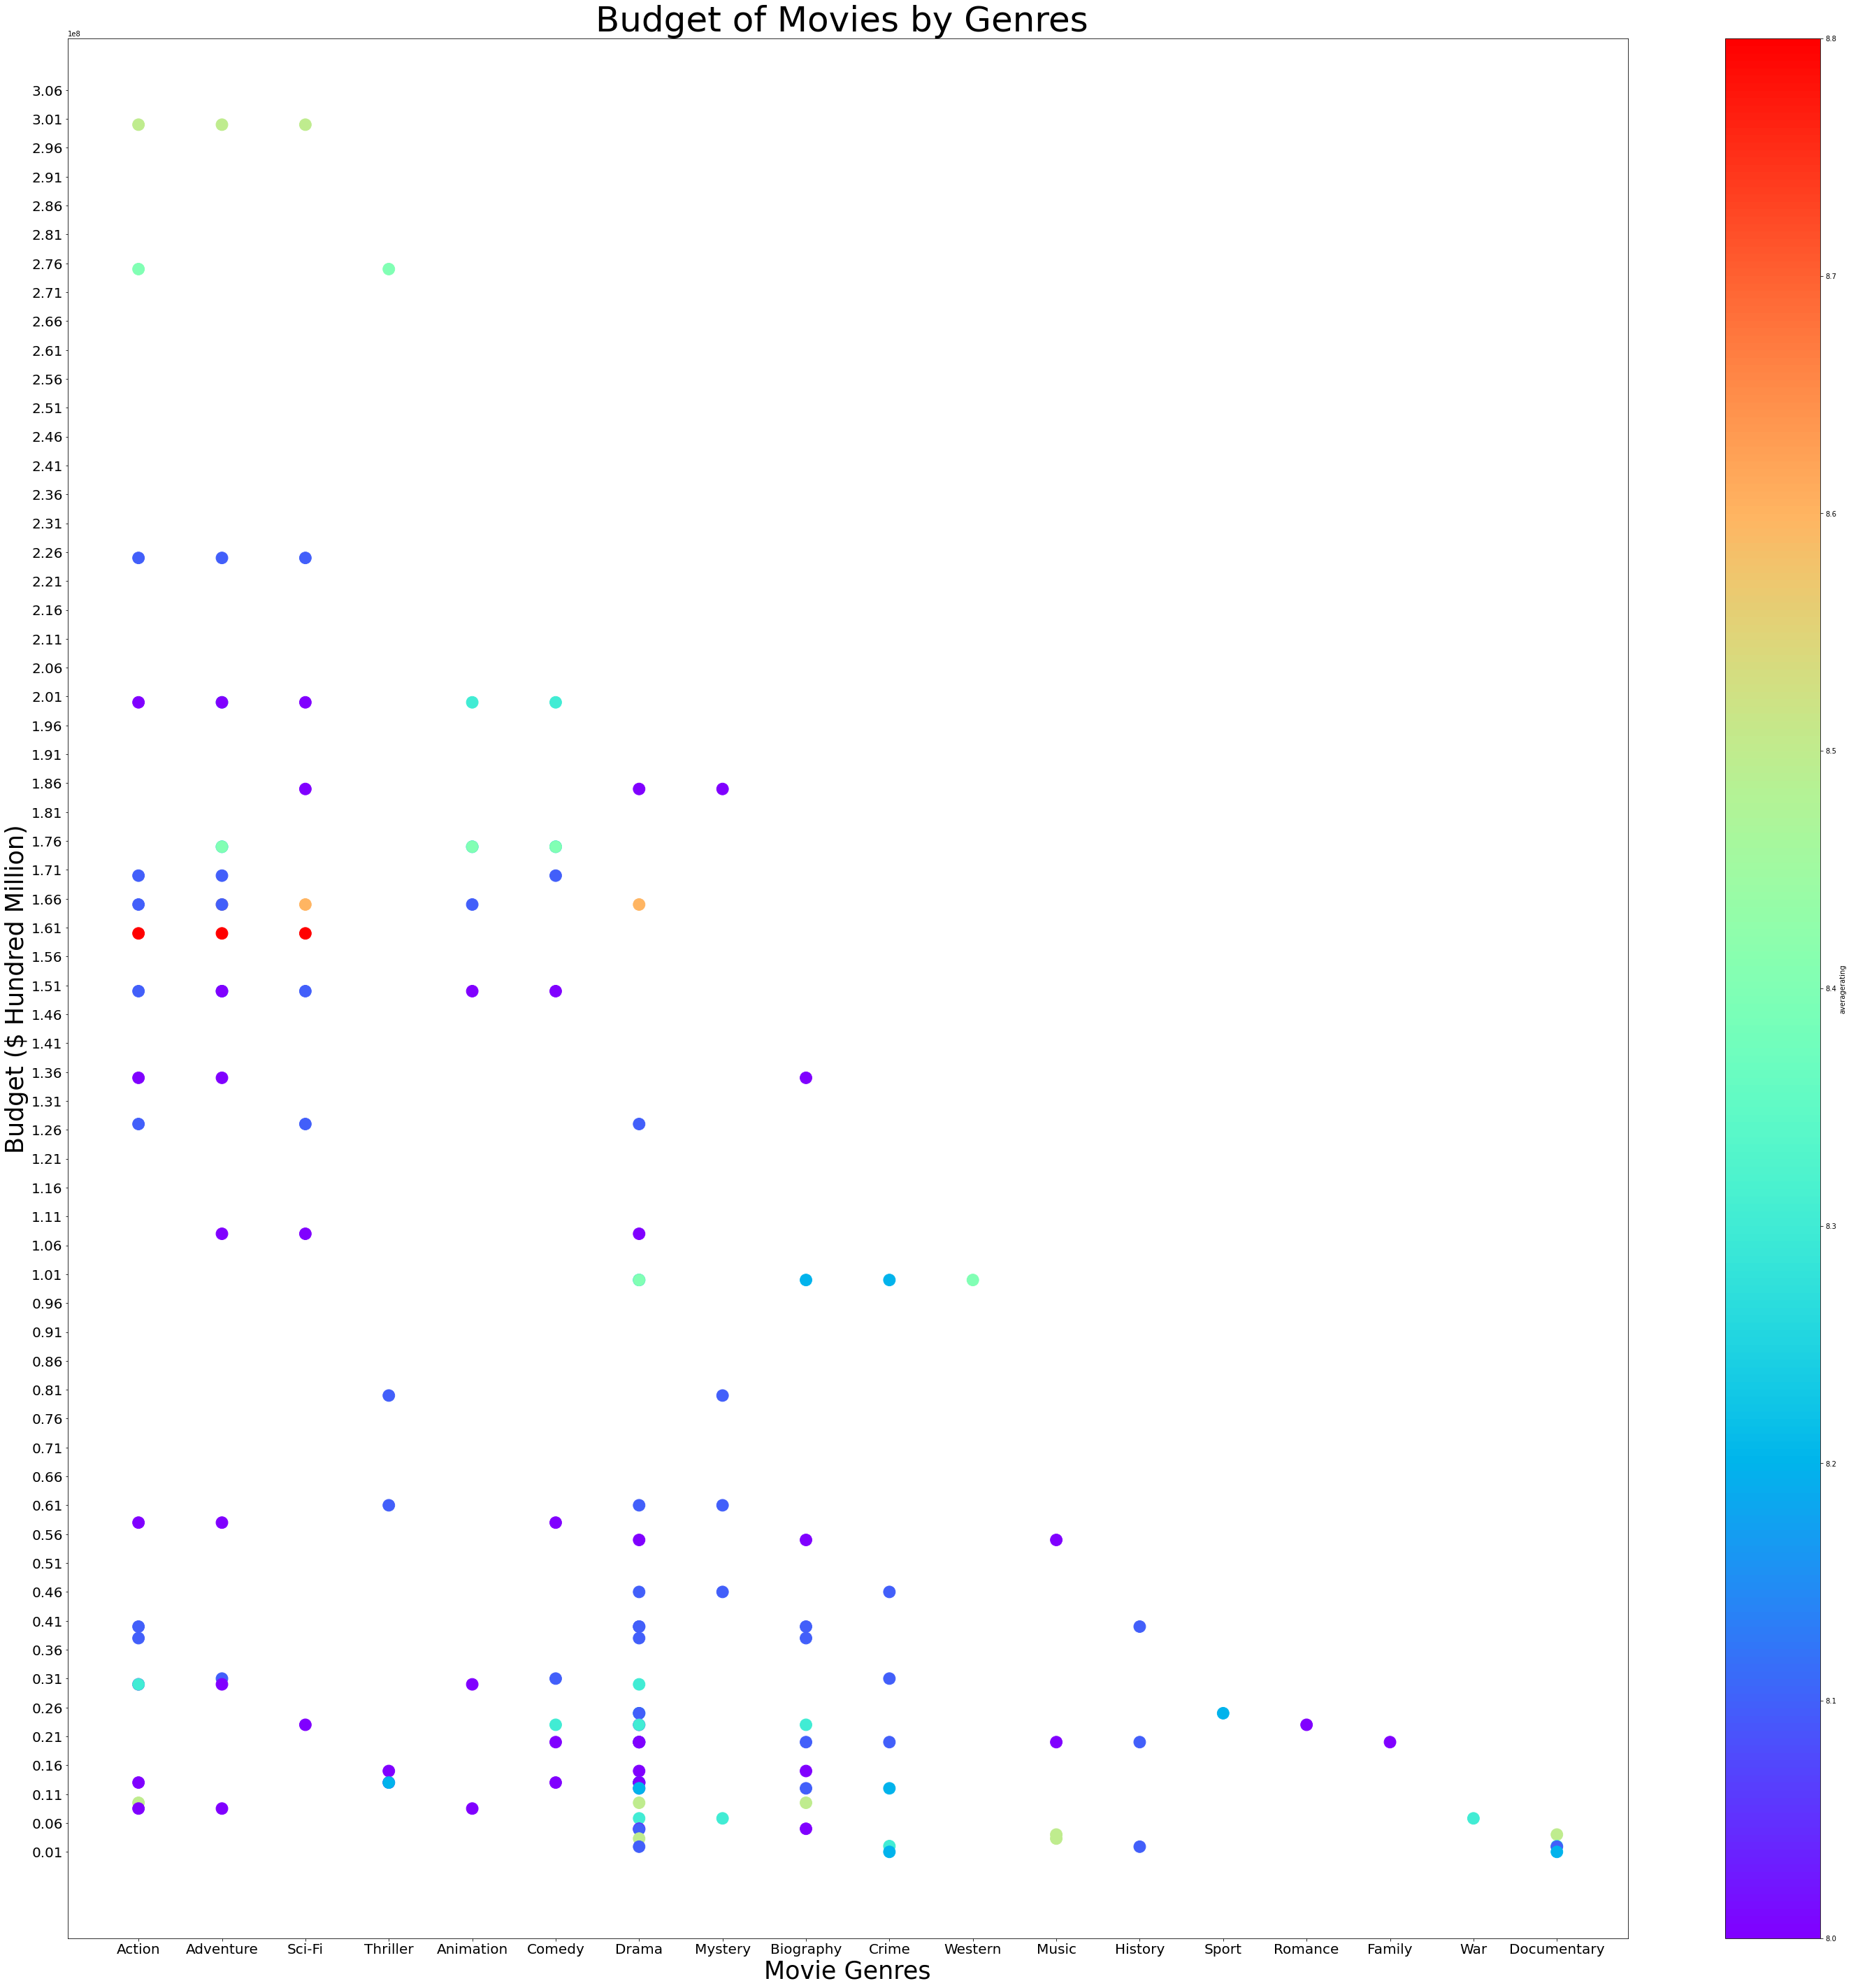

In [58]:
#Plot the genres by Budget

fig, genreBud_rating_ax = plt.subplots(ncols = 1, nrows = 1, figsize=(50, 50))

bg = budGen_df.plot.scatter(x = "genres", y = "pbud", c = "averagerating" , s = 285,  cmap = "rainbow",  ax= genreBud_rating_ax )


#Set titles
genreBud_rating_ax.set_title('Budget of Movies by Genres ', fontsize=50)
genreBud_rating_ax.set_ylabel('Budget ($ Hundred Million)', fontsize=35)
genreBud_rating_ax.set_xlabel('Movie Genres', fontsize=35)


genreBud_rating_ax.tick_params(axis='x', labelsize=20)
genreBud_rating_ax.tick_params(axis='y', labelsize=20)

#x = np.arange(1, 300, 5)
genreBud_rating_ax.set_yticks(range(1000000, 310000000, 5000000))


#Save image in folder
fig.savefig("genre_ratings_Budget.png", dpi=150)
#plt.show()


## Analysis Evaluation

Thoughts on the interpretation and confidence of the results:
    
   **1.** The results are interpreted by looking at common patterns and questions asked of the data related to the target variable and the specific independent variables.

   **2.** believe that the results can generalize the more other questions are asked of the data.  I am not confident that all the recommendations  will generalize for all movies in different regions and in languages. More parameters would be need to analyzed and more specific genre analysis would be helpful.

   **3.** I am confident that the analysis will benefit the current business problem at hand by extracting and reviewing the similar patterns from semi recent data. The data sources are from some of the popular and widely used sites. It may not be complete, but will be a good intial start

## Conclusions

As a for profit company, high revenue is always a goal. The "rating" was chosen as a target variable because it can help support the goal of revenue, but also provide other insights that can be further explored and explained. The following are recommendations for Microsoft from the analysis: 
    
**1.**  **Invest in at least one of high budget films in the category of "Action, Adventure or Sci-Fi".** 

   - If the action is taken, I highly recommend the one of the Russo brothers or Christopher Nolan directs this movie. 
   - Movie studios have major movies that they can be associated with.  If Microsoft wants to establish themself in the industry they need one (or more) as well.
   - These directors are not only famous but have the movie ratings to prove it. The movies they directed in the mentioned genres had some of the highest number of votes. This is not a direct causation to movie gross, but it is correlated. However,  having  people watch the move in theatres is a good goal, but Microsoft you ultimately want people engaged in the brand. The high number of votes is a datapoint showing the people who view these type of movies can possibly be engaged with the movie brand online regardless of their view of the specific movie. Their engagement opens the oppurtunity for more areas of Microsoft engagement (e.g. games, advertisments, software, metaverse)
    
**2.** **Invest in multiple movies in "Drama, Documentary and/or Crime", at the least "Drama". These types of movies are popular and lower cost risk.**
        
   - From the movies that had at least a 8/10 averagerating; dramas ranked first(124/173 movies), 3rd was documentaries (53/173 movies) and 4th crime (50/173 movies).
   - All three of these genres were across the spectrum in terms of budget and the number of votes for the rating. 
   - Most of the directors review who had multiple movies credits had a movie categorized as "Drama."
   - "Documentaries and Crime" genres don't have the average number of voters as high as the "Action, Adventure and Sci-Fi". This may indicate they had a core fanbase that supports these movies. Therefore "Documentaries and Crime" may ultimately do the best on other platforms.
        
**3.** **For the _intial_ start of the movie studio, _DO NOT_ invest resources in genres focused on "Family, Sports or News". These are higher risk due to lack of highly rated rates compared to the other genres.** 
    
  - There is a substantially lower level of movies in these genres "Family (4) and Sports (9) and News (4)"
  - There budgets are a lot lower overall and pose a risk in the number of viewers leadering to enggement and profit.
  - A lot of multi movie directors do not work in this genre.
  - The mix lower number of budgets, ratings and directors, increase the risk of their reception compared to other genres. 


## Limitations and Improvements

The following are analysis limitations and analysis future analysis ideas for Microsoft:

**1.** Microsoft needs to understand and communicate their constraints and vision for their movie experience. The results given were focused only a few parameters. For more fidelity, the recommendation is to add parameters and/or dive deeper into some of the recommendation's patterns. I would add parameters such as regions where the movive plays as well as languagess. These can give more information and nuances as to where to place theatres and certain movies

**2.** The data analysis was limited in term of the the methods, scope of the analysis and data parameter tuning. The problem given was a one paragraph statement. In a usual business analysis case, there would be more iterative communication with the stakeholder to clarify assumptions, considerations and the specific problem need. Even if Microsoft doesn't know the exact problem, continous communication would refine the vision, values, and initial needs. This analysis  was an intial low fidelity partial solution to the problem.

**3.** Future impovements:

   - Add more parameters to analysis (e.g. region, language). These can give more information and nuances such as  where to place theatres and certain movies from the the genre recommendations.
   - Use the recommendations and do more detailed work into the genres (causality and correlation).
   - Analyse the combinations of the combinations of genres with respect to the target variable and independent variables. For example, movies that were categorized as "Comedy and Animation or Sci-Fi" had higher budgets than "Comedies" that were not. 
   - Research more on Microsoft's current technical ecosystem and their holistic vision as a company. The protential movie studio is a part of a great system and it is impairative this node harmonizes with the rest of the ecosystem. For example, Microsoft recently invested millions of dollars into the metaverse. The movie studio and the metaverse have many connection points (e.g. brands, storylines, characters, stakeholders).  Understanding these points, can help scope and clarify the analysis entities area for a better outcome.
